[1]
3671
[2]
3671
[3]
3671
[4]
3671
[5]
3671


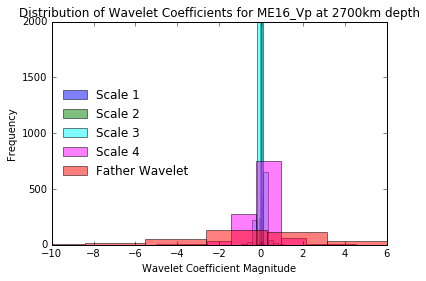

In [47]:
##Given a Model, find the indices that correspond to a particular scale. 
#Then, reconstruct the model at that scale. Do calculations if needed.


####SETUP
Database_Path = '../rem3d/files/'
N = 7
Jmax = 4
WaveletBasisFn = 'D4'
eo =0
EulerConfig = 1
ModelName = 'ME16_Vp'
NumVals = int(6)*int(2)**(int(2)*int(N))
iter_scale = 1;  # 0 is Default. This means the scales are [1,2,3,4,5]
####################################################

#create vectors to store max cof vals

MaxScale1DepthCofs = []
MaxScale2DepthCofs = []
MaxScale3DepthCofs = []
MaxScale4DepthCofs = []
MaxScale5DepthCofs = []
MaxScale6DepthCofs = []
MaxScalingFnDepthCofs = []


MeanScale1DepthCofs = []
MeanScale2DepthCofs = []
MeanScale3DepthCofs = []
MeanScale4DepthCofs = []
MeanScale5DepthCofs = []
MeanScale6DepthCofs = []
MeanScalingFnDepthCofs = []

depths = []
counter = 0
xcorrcoeffs = []
corrdepths = []
pvals = []
####################################################
##########
#Options to do different operations in the script.
iterate_over_depths = 0
The_Chosen_Depth = 2700
The_Chosen_Depth = 6371-The_Chosen_Depth
plot_mean = 0
plot_max = 0
##########
#importing standard modules
import math
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import subprocess as sub
import shutil
import sys
import scipy as sci
import scipy.io as sio
%matplotlib inline
from scipy.sparse import csr_matrix, rand
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.pyplot import register_cmap,get_cmap,colorbar
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
####################       IMPORT PM's MODULES     ######################################
from plottingPM import get_colors,grayify_cmap,make_colormap,customcolorpalette
from drawmapsection3D import get_distaz,delazgc_helper,writejson,readjson, \
    plot_hotspots,plot_plates,plot_gcpaths,get_fullpath,sanitised_input,uniquenumpyrow

####More Setup for File Names
##Naming Conventions
DVBasisName = 'DVmaps.'+ 'N' + str(N) + '.J' + str(Jmax) + '.' + WaveletBasisFn + '.mat'
WaveletCoeffBasisName = 'VWCoeffs.' + 'N'+str(N) + '.J' + str(Jmax) + '.' + \
                        WaveletBasisFn + '.mat'
GridName= 'Grid_N' + str(N) + '_Jmax' + str(Jmax) + \
          '_EulerConfig' + str(EulerConfig) + '.mat'
VeloName = ModelName + '.N' + str(N) + '.Jmax' + str(Jmax) +  \
          '.EulerConfig' + str(EulerConfig) + '.mat'

####Read the .mat files.
WaveletBasis = sio.loadmat(Database_Path + DVBasisName)
WaveletCoeffBasis = sio.loadmat(Database_Path + WaveletCoeffBasisName)
Grids = sio.loadmat(Database_Path + GridName)
ModelFile = sio.loadmat(Database_Path + VeloName)
####
#Declare some variables
Vvals = ModelFile['model']
wvcoeffs = ModelFile['wvcoeffs']
Depths = ModelFile['depth']
if iterate_over_depths == 1:
    Depth_List = np.unique(Depths)
    Depth_List = np.flip(Depth_List,0)
else:
    Depth_List = np.array([The_Chosen_Depth])
####


################################
###Setup the iterations over here. 
Scale_List = [1,2,3,4,5]

if iter_scale == 1:
    for iiii in range(len(Scale_List)):
        Scale_Interest = [Scale_List[iiii]]        
        print(Scale_Interest)

        for iii in range(len(Depth_List)):
            Depth_Interest = Depth_List[iii]
            print(Depth_Interest)

###Find the indices that correspond to a particular scale or set of scales. 
            for i in range(np.size(Scale_Interest)):
                    Temp_Scale_Checker = np.nonzero(Grids['ScaleIndex'][0,:] == (Scale_Interest[i]))
                    if i == 0:
                        Scale_Checker = Temp_Scale_Checker
                    elif i > 0:
                        Scale_Checker = np.concatenate([Scale_Checker,Temp_Scale_Checker],axis=1)
###


###Now find all the wavelet coefficients at a specific depth

            Depth_Checker = np.nonzero(ModelFile['depth'] == (Depth_Interest))
            Depth_Coeffs = wvcoeffs[0,Depth_Checker]
            Depth_Coeffs = Depth_Coeffs[0]
###

            Coeff_List = []
###Now extract the wavelet coefficients corresponding to your desired scale
            for i in range(len(Scale_Checker[0])):
                Curr_Index = Scale_Checker[0][i] 
                Curr_BasisIndex = Curr_Index%(NumVals/6)
                Curr_Coeff = Depth_Coeffs[Curr_Index]
                Coeff_List.append(Curr_Coeff)
                

#################################### Now do some calculations, if you want. 
# Things like residuals, correlations, norms. Let's have fun!

            ##Categorize COEFFICIENTS:
            
            if Scale_Interest == [1]:
                Scale1Coeffs = (Coeff_List)
                MaxScale1Coeff = max(Scale1Coeffs)
                MaxScale1DepthCofs.append(MaxScale1Coeff)
                MeanScale1DepthCofs.append(np.mean(np.abs(Scale1Coeffs)))
            elif Scale_Interest == [2]:
                Scale2Coeffs = (Coeff_List)
                MaxScale2Coeff = max(Scale2Coeffs)
                MaxScale2DepthCofs.append(MaxScale2Coeff)
                MeanScale2DepthCofs.append(np.mean(np.abs(Scale2Coeffs)))
            elif Scale_Interest == [3]:
                Scale3Coeffs = (Coeff_List)
                MaxScale3Coeff = max(Scale3Coeffs)
                MaxScale3DepthCofs.append(MaxScale3Coeff)
                MeanScale3DepthCofs.append(np.mean(np.abs(Scale3Coeffs)))
            elif Scale_Interest == [4]:
                Scale4Coeffs = (Coeff_List)
                MaxScale4Coeff = max(Scale4Coeffs)
                MaxScale4DepthCofs.append(MaxScale4Coeff)
                MeanScale4DepthCofs.append(np.mean(np.abs(Scale4Coeffs)))
            elif Scale_Interest == [5]:
                Scale5Coeffs = (Coeff_List)
                MaxScale5Coeff = max(Scale5Coeffs)
                MaxScale5DepthCofs.append(MaxScale5Coeff)
                MeanScale5DepthCofs.append(np.mean(np.abs(Scale5Coeffs)))
            elif Scale_Interest == [6]:
                Scale6Coeffs = (Coeff_List)
                MaxScale6Coeff = max(Scale6Coeffs)
                MaxScale6DepthCofs.append(MaxScale6Coeff)
                MeanScale6DepthCofs.append(np.mean(np.abs(Scale6Coeffs)))
                
            if Scale_Interest == [Jmax+1]:
                ScalingFnCoeffs = (Coeff_List)
                MaxScalingFnCoeff = max(ScalingFnCoeffs)
                MaxScalingFnDepthCofs.append(MaxScale1Coeff)
                MeanScalingFnDepthCofs.append(np.mean(np.abs(ScalingFnCoeffs)))
                
            
##Mean scaling coeffs
if plot_mean == 1:
    fig = plt.figure()
    ax = plt.subplot(111)
    Scale1 = ax.plot(MeanScale1DepthCofs, 6371-Depth_List,'b-',label='Scale 1')
    ax.plot(MeanScale1DepthCofs, 6371-Depth_List,'bo')
    Scale2 = ax.plot(MeanScale2DepthCofs, 6371-Depth_List,'g-',label='Scale 2')
    ax.plot(MeanScale2DepthCofs, 6371-Depth_List,'go')
    Scale3 = ax.plot(MeanScale3DepthCofs, 6371-Depth_List,'c-',label='Scale 3')
    ax.plot(MeanScale3DepthCofs, 6371-Depth_List,'co')
    Scale4 = ax.plot(MeanScale4DepthCofs, 6371-Depth_List,'m-',label='Scale 4')
    ax.plot(MeanScale4DepthCofs, 6371-Depth_List,'mo')
    Scaling_Function = ax.plot(MeanScale5DepthCofs, 6371-Depth_List,'y-',label='Father Wavelet')
    ax.plot(MeanScale5DepthCofs, 6371-Depth_List,'yo')


    ax.set_ylabel('Depth(km)')
    ax.set_xlabel('Maximum Wavelet Coefficients')
    ax.set_title('Mean Scale Coefficients of seismic heterogeneity for ' + ModelName)
    plt.gca().invert_yaxis()
    plt.xlim(0, 4)

    CMB = [0, 500, 1000, 1500, 2000, 2500, 2891]
    y_ticks_labels = ['0','500','1000','1500','2000','2500','CMB']
    # Set number of ticks for x-axis
    ax.set_yticks(CMB)
    # Set ticks labels for x-axis
    ax.set_yticklabels(y_ticks_labels, rotation='horizontal')
    #plt.legend([Scale1,Scale2,Scale3,Scale4,Scaling_Function,Model_Norm],['Scale 1','Scale 2','Scale 3','Scale 4','Scaling Function','Model'])
    plt.legend(frameon=False,loc=5)
    plt.show()
############
if plot_max == 1:
    fig = plt.figure()
    ax = plt.subplot(111)
    Scale1 = ax.plot(MaxScale1DepthCofs, 6371-Depth_List,'b-',label='Scale 1')
    ax.plot(MaxScale1DepthCofs, 6371-Depth_List,'bo')
    Scale2 = ax.plot(MaxScale2DepthCofs, 6371-Depth_List,'g-',label='Scale 2')
    ax.plot(MaxScale2DepthCofs, 6371-Depth_List,'go')
    Scale3 = ax.plot(MaxScale3DepthCofs, 6371-Depth_List,'c-',label='Scale 3')
    ax.plot(MaxScale3DepthCofs, 6371-Depth_List,'co')
    Scale4 = ax.plot(MaxScale4DepthCofs, 6371-Depth_List,'m-',label='Scale 4')
    ax.plot(MaxScale4DepthCofs, 6371-Depth_List,'mo')
    Scaling_Function = ax.plot(MaxScale5DepthCofs, 6371-Depth_List,'y-',label='Father Wavelet')
    ax.plot(MaxScale5DepthCofs, 6371-Depth_List,'yo')


    ax.set_ylabel('Depth(km)')
    ax.set_xlabel('Maximum Wavelet Coefficients')
    ax.set_title('Maximum Scale Coefficients of seismic heterogeneity for ' + ModelName)
    plt.gca().invert_yaxis()
    plt.xlim(0, 40)

    CMB = [0, 500, 1000, 1500, 2000, 2500, 2891]
    y_ticks_labels = ['0','500','1000','1500','2000','2500','CMB']
    # Set number of ticks for x-axis
    ax.set_yticks(CMB)
    # Set ticks labels for x-axis
    ax.set_yticklabels(y_ticks_labels, rotation='horizontal')
    #plt.legend([Scale1,Scale2,Scale3,Scale4,Scaling_Function,Model_Norm],['Scale 1','Scale 2','Scale 3','Scale 4','Scaling Function','Model'])
    plt.legend(frameon=False,loc=5)
    plt.show()
##########
if iterate_over_depths == 0:
    fig = plt.figure()
    ax2 = plt.subplot(111)
    plt.hist(Scale1Coeffs,color='blue',alpha=0.5,label='Scale 1')
    plt.hist(Scale2Coeffs,color='green',alpha=0.5,label='Scale 2')
    plt.hist(Scale3Coeffs,color='cyan',alpha=0.5,label='Scale 3')
    plt.hist(Scale4Coeffs,color='magenta',alpha=0.5,label='Scale 4')
    plt.hist(ScalingFnCoeffs,color='red',alpha=0.5,label='Father Wavelet')
    plt.legend(frameon=False,loc=6)
    ax2.set_title('Distribution of Wavelet Coefficients for ' + ModelName + ' at ' + str(6371-The_Chosen_Depth) + 'km depth')
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('Wavelet Coefficient Magnitude')
    plt.ylim(0, 2000)
    plt.xlim(-10, 6)
    plt.show()
##########

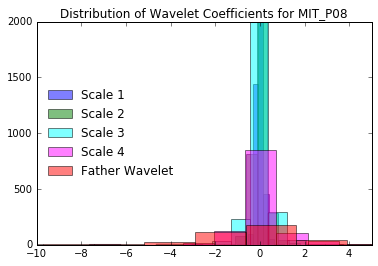

In [2]:
Scale_Checker[0][i]

64

In [9]:
np.nonzero(ModelFile['depth'] == ([6271]))

(array([ 98304,  98305,  98306, ..., 196605, 196606, 196607]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [5]:
Depth_Interest

100